Author :- Prachi Mhetre

Email :- prachimhetre273@gmail.com

Grip @ The Spark's Foundation in Data Science & Business Analytics

#Task2 : Prediction Using UnSupervised ML ( Level - Beginner )
From a given dataset of Iris predict the optimum number of clusters and represent it visually.

Data can be found at : https://bit.ly/3kXTdox

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
#importing the dataset
df = pd.read_csv('G:\python setup\Iris.csv')

In [3]:
#Viewing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Get the count of rows & columns in the datset
df.shape

(150, 6)

In [5]:
# Get column names from dataset
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Drop the columns ID and Species because it is an unsupervised learning problem
new_df = df.drop(columns= ['Species','Id'])
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#Calculating the within-cluster sum of squares(WSS)
wss = []
clusters_range = range(1,11)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(new_df)
    wss.append(km.inertia_)

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\EASY\AppData\Local\Temp/ipykernel_464/4232716667.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(clusters_range,wss, 'go--', color='red')


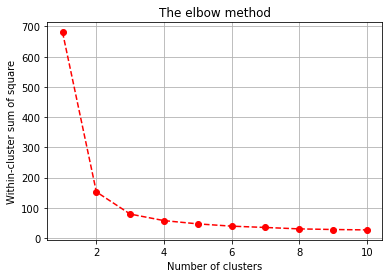

In [8]:
#Plotting the WSS against clusters range
plt.plot(clusters_range,wss, 'go--', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

Elbow method is used to find optimum number of clusters. When within-cluster sum of squares doesn't decrease significantly with every iteration.
From above graph it is clear that optimum no of clusters is 3.

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
predictions = model.fit_predict(new_df)

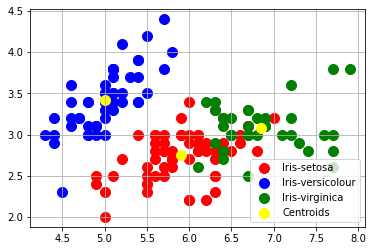

In [13]:
#Visualising the clusters from graph
x = new_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c= 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
